## Assignment 4: Obsevational Studies and Applied ML

### Deadline
November 21st,11:59PM

### Important notes

Make sure you push on GitHub your notebook with all the cells already evaluated. Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented. Back up any hypotheses and claims with data, since this is an important aspect of the course. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.

Use this legendary link to create your repository: [link](https://classroom.github.com/g/YXtsr0QK)

In [1]:
# Put your imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.linear_model import  LogisticRegression
import seaborn as sns
import warnings
from scipy import stats
import itertools
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from operator import itemgetter

In [2]:
data_folder = './data/'

## Task 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

Hint: It is useful to add a notion of confidence to your results and explore the data visually. You are allowed to use the SciPy library.

# A) 
You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

In [3]:
# read csv file into dataframe
data = pd.read_csv(data_folder + "acs2015_county_data.csv")
data.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


Let's try to create a linear model with sklearn:

In [4]:
# set the x-data as the SelfEmployed
x = data.SelfEmployed
# Set the y-data as the IncomePerCap
y = data.IncomePerCap

# use linregress from scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("IncomePerCap = {0} * {1} + {2}".format(slope, "SelfEmployed",intercept))

IncomePerCap = 138.30914997480608 * SelfEmployed + 22884.73105154766


In [5]:
print("The standard error is {} : ".format(std_err))

The standard error is 27.83001208774982 : 


**From the linear regression above we can see that the slot is too low compared to the intercept which implies that the linear dependency is not very significant. Also we can constat that the standard error is high which means that precesion is low**

Now let's observe the relationship between the Income Per Capita and the pourcentage of Self Employing

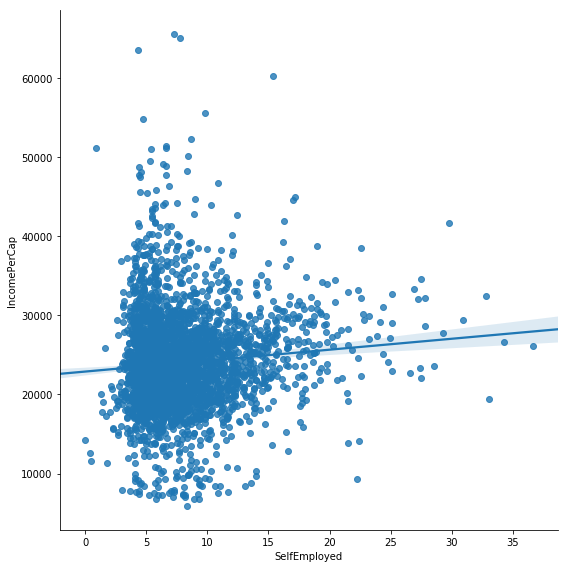

In [6]:
# Plot data and regression model fits across a FacetGrid.
sns.lmplot(y='IncomePerCap', x='SelfEmployed',data = data, size = 8)

We can observe here that the linear regression does not fit a lot the model when the SelfEmployed is between 0 and 20. The highest IncomePerCap came from states with a low self employing pourcentage. But the linear model is clearer when the percountage exceeds 20.

**Answer:** Citizens in counties that have a higher percentage of self-employed people don't earn more per capita. In general, the higher income per capita came from counties where self-employing is not very important. 



# B)
The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

In [7]:
# select the three states mentioned above
A = data.loc[data['State'].isin(['Wisconsin','Tennessee','Minnesota'])].reset_index()
# drop the index
A = A.drop(['index'],axis=1)
#show the head
A.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,27001,Minnesota,Aitkin,15839,8064,7775,1.1,94.4,0.3,1.8,...,4.3,1.5,5.2,25.1,6428,75.4,15.2,9.2,0.2,7.3
1,27003,Minnesota,Anoka,338764,169586,169178,3.9,83.8,4.9,0.6,...,1.1,0.9,4.0,28.1,181190,84.7,11.0,4.2,0.1,6.2
2,27005,Minnesota,Becker,33138,16601,16537,1.8,86.8,0.5,7.0,...,2.9,1.5,6.6,22.8,15929,74.3,16.4,9.0,0.3,3.5
3,27007,Minnesota,Beltrami,45434,22740,22694,1.9,73.4,0.8,20.0,...,3.2,1.3,6.5,20.2,20579,66.8,26.9,6.2,0.1,10.6
4,27009,Minnesota,Benton,39221,19500,19721,1.9,92.7,2.3,0.3,...,1.5,1.6,4.9,23.3,20104,82.9,11.2,5.7,0.2,6.7


In [8]:
# set xA-data as SelfEmployed
xA = A.SelfEmployed
# set yA-data as InncomePerCap
yA = A.IncomePerCap

# use linregress from scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(xA,yA)
print("IncomePerCap = {0} * {1} + {2}".format(slope, "SelfEmployed",intercept))

IncomePerCap = -357.4213020901421 * SelfEmployed + 27797.278449632442


In [9]:
print("The standard error is {} : ".format(std_err))

The standard error is 108.99963215487588 : 


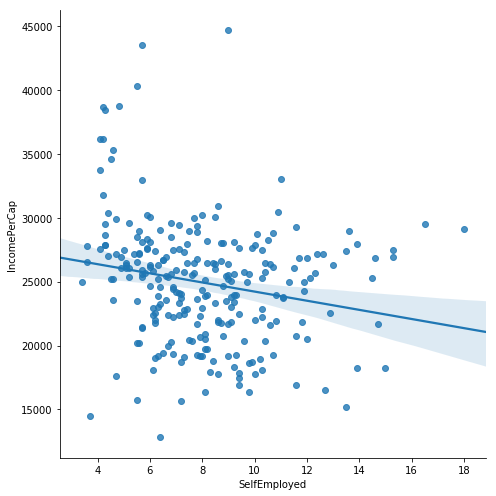

In [10]:
# Combined plot, we do not make differnece between states
sns.lmplot(y='IncomePerCap', x='SelfEmployed',  data = A, size=7 )

**As you can see above the slot is neagtive which implies that the incodePerCap decrease when we have more SelfEmployed. Also we can see that the standard error is also important which means that the precison of my model is low**

# C) 
 In which state within set A is the observed effect of self-employment on per-capita income the strongest?

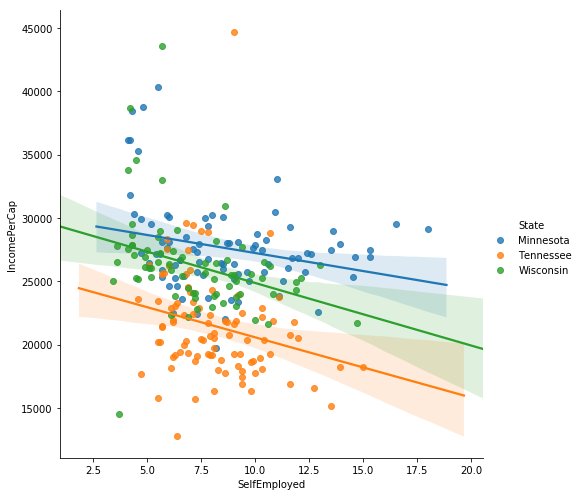

In [11]:
import matplotlib.pyplot as plt
# seperated plot, consider states separately
sns.lmplot(y='IncomePerCap', x='SelfEmployed', hue='State', data = A, size=7 )

**Above we have made seprated slope for the states, since the slopes are negative so the incomePerCap decreases with the SelfEmployed :**
* the strongest negative(Decreasing slot) effect is in Winsconsin state
* the strogest positve(Increasing slot) effect is in Minnesota state

# D) 
Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.


In [12]:
# Select the above states
B = data.loc[data['State'].isin(['New Jersey', 'Kansas', 'Rhode Island'])]
B.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
888,20001,Kansas,Allen,13081,6441,6640,3.1,91.2,1.7,0.2,...,4.4,1.4,3.2,16.3,5863,72.8,17.8,9.1,0.2,7.0
889,20003,Kansas,Anderson,7896,3921,3975,0.4,95.0,0.1,2.3,...,3.3,2.3,4.4,24.9,3593,68.0,13.1,18.7,0.3,5.9
890,20005,Kansas,Atchison,16633,7977,8656,2.8,88.2,4.1,0.4,...,7.4,1.0,6.9,20.8,7519,80.1,13.5,6.0,0.4,7.3
891,20007,Kansas,Barber,4770,2396,2374,3.4,93.0,0.3,0.3,...,2.9,0.9,5.6,13.5,2350,70.3,17.3,12.0,0.5,3.1
892,20009,Kansas,Barton,27399,13307,14092,14.0,82.6,1.3,0.1,...,3.0,1.0,3.1,17.0,13200,76.0,16.0,7.7,0.2,6.8


In [13]:
# set xA-data
xB = B.SelfEmployed
# set yA-data
yB = B.IncomePerCap

# use linregress from scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(xB,yB)

print("IncomePerCap = {0} * {1} + {2}".format(slope, "SelfEmployed",intercept))

IncomePerCap = -309.9965160556779 * SelfEmployed + 30112.81399141826


In [14]:
print("The standard error is {} : ".format(std_err))

The standard error is 114.31996089178831 : 


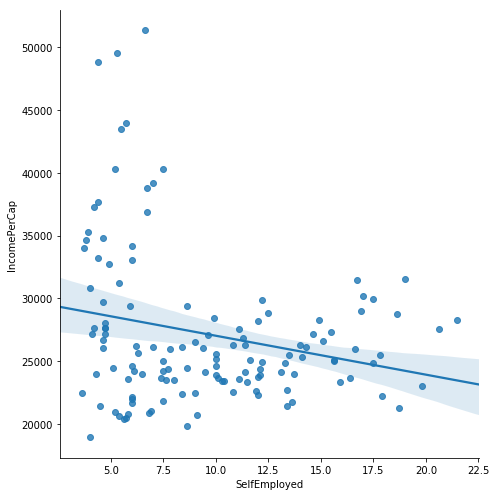

In [15]:
# Combined plot, we do not make differnece between states
sns.lmplot(y='IncomePerCap', x='SelfEmployed',  data = B, size=7 )

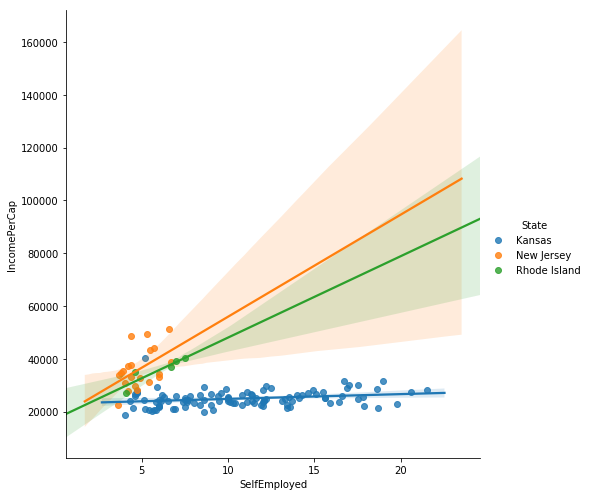

In [16]:
# seperated plot, consider states separately
sns.lmplot(y='IncomePerCap', x='SelfEmployed', hue='State', data = B,size=7)

**From the aboves plots we can see that Kansas was the responsable for the decreasing slope when considered states together but Kansas and New Jersey have an increasing slope.
However, the inreasing slope does not mean for sure that IncomePerCap increases with the SelfEmployed beacause we dont have enough data samples in thoses sates.**

**Form the analysis done above, we would better recommend investing selfEmployement in set B than A. In fact, in dataset B all the slopes considred seprately are increasing (Even if it's not clear in Kansas State but it's the case)**

## Task 2: All you need is love… And a dog!

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

**A)** Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.

**B)** Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.

**C)** Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

**D)** Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

You are allowed to use the scikit-learn library to implement your classifiers.

# A) 
Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.

In [17]:
# load the data set
intakes_outcome = pd.read_csv( data_folder + 'aac_intakes_outcomes.csv')
# Select features we are interesed in
features = ['animal_type' ,'intake_year','intake_condition','intake_number' ,'intake_type', \
            'sex_upon_intake' ,'age_upon_intake_(years)','time_in_shelter_days', 'sex_upon_outcome','age_upon_outcome_(years)','outcome_type']
intakes_outcome = intakes_outcome[features]

In [18]:
# get dummie values for categorical features
categorical_columns = ["animal_type","intake_condition","intake_type","sex_upon_intake","sex_upon_outcome","outcome_type"]
non_categorical = list (set (features) - set(categorical_columns))


In [95]:
# Split our data into train and test data
train = intakes_outcome.sample(frac=0.8) #training_set
test = intakes_outcome.drop(train.index) #test_set

# use get dummies to transform categorical features
train = pd.get_dummies(train, columns= categorical_columns)
test = pd.get_dummies(test, columns= categorical_columns)

In [96]:
# Get missing columns in the training test
missing_cols = set( train.columns ) - set( test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test = test[train.columns]

In [97]:
# select features, drop the target
filter_outcomes = list(train.filter(regex='outcome_type'))
feature_cols = train[train.columns.drop(filter_outcomes)].columns

In [98]:
# set the X-train and y-train sets
X_train = train[feature_cols]
y_train = train.outcome_type_Adoption

# set the X-test and y-test sets
X_test = test[feature_cols]
y_test = test.outcome_type_Adoption

In [23]:
# Define standardize function
def standardize(x):
    mean_x = np.mean(x, axis=0)
    x = x - mean_x
    std_x = np.std(x, axis=0)
    x = x / std_x
    return x

In [99]:
# stnadardize all values for the train set
X_train = standardize(X_train)
X_train = X_train.reset_index().drop(axis = 1,labels=['index'])

In [100]:
# stnadardize all values for the test set
X_test = standardize(X_test)
X_test = X_test.reset_index().drop(axis = 1,labels=['index'])

### We decided  to standardize the  categorical features because we have found a better accuracy with them being normalized

# B) 
Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.



In [26]:
# create the logistic model and fitting it with X_train and Y_train 
logistic = LogisticRegression(solver='lbfgs')
# fit the model
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
# generate predcition probabilities
pred = logistic.predict_proba(X_test)

In [28]:
# define a function generate prediciton that will decide if the output is 0 or 1 according to a threshold
def generate_prediction(pred,threshold):
    y_pred = []
    for x in pred:
        if (x[0]>=threshold):
            y_pred.append(0)
        else :
            y_pred.append(1)
    return y_pred

In [29]:
# compute the precision,recall,F1_score,accuracy metrics
def compute_metrics(TN,FN,FP,TP):
    # compute precision
    precision = TP/(TP+FP)
    # compute recall
    recall = TP/(TP+FN)
    # compute F1_score
    F1_score = 2 * precision * recall / (precision + recall)
    return precision,recall,F1_score

In [30]:
# this sfunction will plot the confusion matrix 
def plot_confusion_matrix(cm, classes = [0,1], normalize=False, title='Confusion Matrix', cmap=plt.cm.Reds):
    # set the parameteres of the figure
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    
    # set the Xticks and yticks
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round (cm[i, j],2), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    # prepare the figure attributes
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [31]:
def validation(pred,y_test,threshold, plot=False):
    # generate predictions depending on the threshold
    y_pred = generate_prediction(pred,threshold)
    # calculate confusion matrix
    conf_matrix = confusion_matrix(y_test,y_pred)    
    # extract TN FN FP and TP values
    TN = conf_matrix[0][0] 
    FN = conf_matrix[1][0] 
    FP = conf_matrix[0][1] 
    TP = conf_matrix[1][1] 
    # compute metrics
    precision_A,recall_A,F1_score_A = compute_metrics(TN,FN,FP,TP)
    precision_NA,recall_NA,F1_score_NA = compute_metrics(TP,FP,FN,TN)
    # compute accuracy which is the same for both classes
    accuracy = (TP+TN)/(TP+TN+FN+FP)
    # we plot the confusion matrix if plot = True
    if plot:
        plot_confusion_matrix(conf_matrix, [0,1], normalize=False, title='Confusion Matrix', cmap=plt.cm.Reds)
    # create a tab to returned values
    A_tab = [precision_A,recall_A,F1_score_A, accuracy]
    NA_tab = [precision_NA,recall_NA,F1_score_NA, accuracy]
    return A_tab, NA_tab

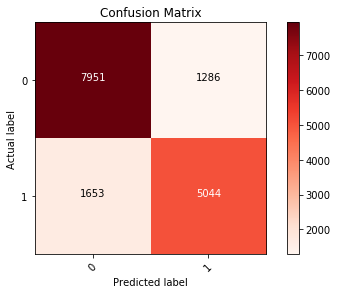

In [32]:
# For the first part of the exercice we consider 0.5 as threshold
A_tab,NA_tab = validation(pred,y_test,0.5, plot=True)

In [66]:
print ("accuracy = {0}".format(A_tab[3]))
print ( "class adopted (positive) : precision={0}, recall={1} , F1_score={2}".format(A_tab[0],A_tab[1],A_tab[2]))
print ( "class non adopted (negative): precision={0}, recall={1} , F1_score={2}".format(NA_tab[0],NA_tab[1],NA_tab[2]))

accuracy = 0.815551650558554
class adopted (positive) : precision=0.7968404423380727, recall=0.7531730625653278 , F1_score=0.7743916481154526
class non adopted (negative): precision=0.8278842149104539, recall=0.8607773086499946 , F1_score=0.8440104028448596


In [33]:
def compute_different_thresholds(pred,y_test):
    # create the range of the threshold
    threshold_range = np.linspace(0,1,40)
    validation_tab=[]

    # tune thresholds
    for threshold in threshold_range[1:]:
        validation_tab.append(validation(pred,y_test,threshold))
    return validation_tab,threshold_range

In [34]:
# separate classes (adopted and nonadopted)
def get_classes(validation_tab):
    class_adopted = [i[0] for i in validation_tab]
    class_nonadopted = [i[1] for i in validation_tab]
    return class_adopted,class_nonadopted

# this function will return precision,recall, F1_score, accuracy
def get_metrics(class_):
    return [i[0] for i in class_], [i[1] for i in class_], [i[2] for i in class_], [i[3] for i in class_]

In [35]:
# this methode will plot 3 subplots of Precision_recall , F1_score and accuracy
def plot_figures(precision, recall, F1_score, accuracy,threshold_range):
    #Creates  3 subplots 
    f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(26,4),sharey=True)
    
    # set the first ax1 
    ax1.plot(recall, precision,'o-')
    ax1.set_title('Precision vs recall plot')
    ax1.set_xlabel('recall')
    ax1.set_ylabel('precision')
    
    #set the second ax2
    ax2.plot(threshold_range[1:], F1_score,'o-')
    ax2.set_title('F1_score vs range')
    ax2.set_xlabel('threshold')
    ax2.set_ylabel('F1_score')
    
    # set the third ax3
    ax3.plot(threshold_range[1:], accuracy,'o-')
    ax3.set_title('accuracy plot')
    ax3.set_xlabel('threshold')
    ax3.set_ylabel('accuracy')
   

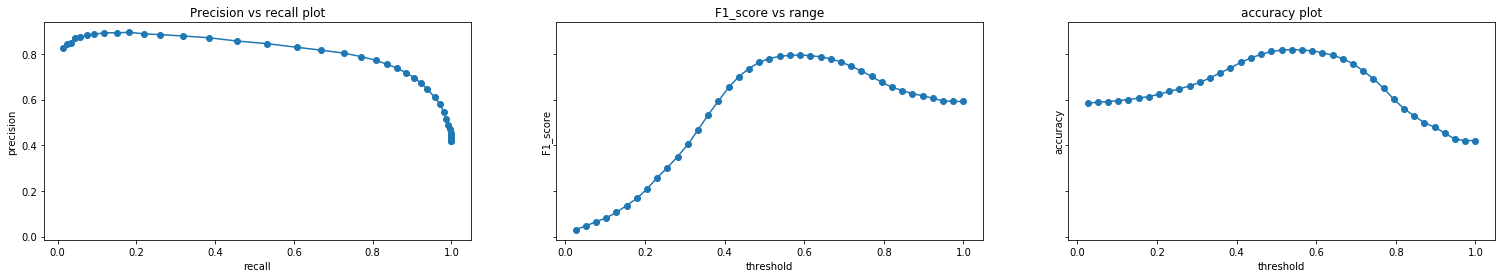

In [36]:
# get metrics with class_adopted
validation_tab,threshold_range = compute_different_thresholds(pred,y_test)
class_adopted,class_nonadopted = get_classes(validation_tab)
precisionA,recallA, F1_scoreA, accuracy = get_metrics(class_adopted)
plot_figures(precisionA,recallA, F1_scoreA, accuracy,threshold_range)

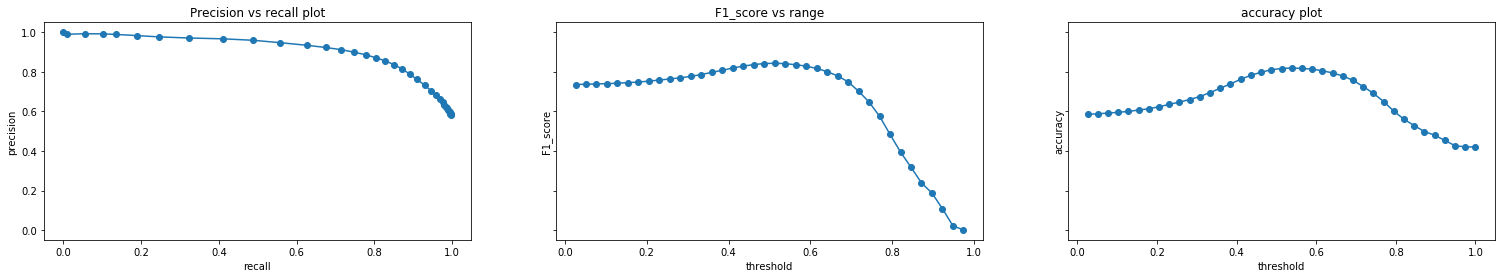

In [37]:
# get metrics with class non adopted
precisionNA,recallNA, F1_scoreNA, accuracy = get_metrics(class_nonadopted)
plot_figures(precisionNA,recallNA, F1_scoreNA, accuracy,threshold_range)

Text(0,0.5,'precision')

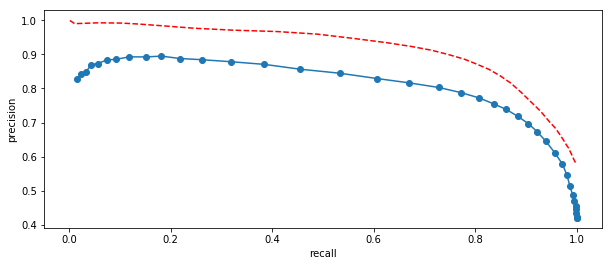

In [38]:
# this figure will help us choose which class are we going to use 
f, ax1 = plt.subplots(figsize=(10,4),sharey=True)
ax1.plot(recallA, precisionA,'o-')
ax1.plot(recallNA, precisionNA,'r--')
ax1.set_xlabel('recall')
ax1.set_ylabel('precision')

**Answer to : What metric (precision, recall, accuracy, or F1-score)  and with respect to what class is the most relevant when choosing the threshold in this scenario, and why?**
* First a bad precision is a False alarme which means the animal goes to sleep but it could've been adopted
* Second a bad recall means keeping animals that will not be adopted

**To compromise both steps above we will use a F_score metric which is a harmonic mean of precision and recall. For the first point we lost an animal and in the seconfd point we lose a place in the shelter**
**To choose which class we are going to use we selected the class with a curves close to the PRC for a perfect test which have a better performance level than the ones closes to the baseline. In other words, a curve above the other curve has a better performance level.
In our case it's the non adoptive class**

# C) 
Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

In [39]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    
    num_row = y.shape[0]
    # Set the intervals to split y
    interval = int(num_row / k_fold)
    # We fix the seed to have the same result each call to the function
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    # Split array of indices into 5 intervals
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

In [40]:
def accuracy(pred, y):
    '''
    Calculates the accuracy by comparing the predictions with given test data.
    '''
    N = len(pred)
    count = 0.0
    for i in range(len(pred)):
        if pred[i] == y[i]:
            count += 1
    return count/N

In [41]:
def split_train_test(y,x,k_indices,k): 
    # get k'th subgroup in test, others in train:
        # 1. Set the indices of test and train 
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
        # 2. Prepare train and test sets
    y_te = y[te_indice]
    y_tr = y[tr_indice]
    x_te = x[te_indice]
    x_tr = x[tr_indice]
    return y_te,y_tr,x_te,x_tr
    

In [42]:
def train_model_logistic(y,x,k_indices, k):
    """return the accuracy of logistic regression."""
    y_te,y_tr,x_te,x_tr = split_train_test(y,x,k_indices,k)
    # create the logistic model and fitting it with X_train and Y_train 
    logistic = LogisticRegression(solver='lbfgs')
    logistic.fit(x_tr, y_tr)
    # get the predicition
    y_pred = logistic.predict(x_te)
    ## Calculate accuracy based on the test sets
    score = accuracy(y_pred, y_te)
    return score

In [43]:
def cross_validation():
    # Set the seed
    seed = 12
    num_folds = 5
    # Prepare x_train and y_train to split them into 5 folds
    x = X_train.reset_index().drop('index', axis = 1)
    y = y_train.to_frame().reset_index().drop('index', axis = 1)
    # K most important features:
    k = np.linspace(1,30,num=7,dtype= int)
    # split data in k fold
    indices = build_k_indices(np.array(y), num_folds, seed)
    # This table will contain the remained k most important columns and the accuracy
    result = []
    # the loop stops when we found the result for the k subsets using backward feature selection
    while len(result) != len(k) :
        # Start with all the columns and remove the 'worst' column on each iteation 
        for col in x.columns:
            column_selection = list (set(x.columns) - set(col))
            x_selected_features = x[column_selection]
            # Table to save the accuracy of each fold with the selected features
            accuracy_fold = []
            # Table to save the mean accuracy of training the model with the selected features over all folds
            accuracy = [] 
            for fold in range(num_folds):
                # Train model 
                score = train_model_logistic(np.array(y), np.array(x_selected_features), indices, fold)
                accuracy_fold.append(score)
            accuracy.append((np.mean(accuracy_fold),col))
        # Drop the worst feature (The absence of that feature gives the maximum accuracy)
        max_accuracy = max(accuracy,key=itemgetter(0))
        x.drop(max_accuracy[1],inplace = True, axis = 1)
        print("droped arguments is : {}".format(max_accuracy[1]))
        print("len of column remained : {}".format(len(x.columns)))
        # Append to result the columns and accuracy  when the remaining number of columns is in k 
        if len(x.columns)  in k :
            result.append((x.columns,max_accuracy[0]))
    return result

In [44]:
result = cross_validation()

droped arguments is : sex_upon_outcome_Unknown
len of column remained : 31
droped arguments is : sex_upon_outcome_Spayed Female
len of column remained : 30
droped arguments is : sex_upon_outcome_Neutered Male
len of column remained : 29
droped arguments is : sex_upon_outcome_Intact Male
len of column remained : 28
droped arguments is : sex_upon_outcome_Intact Female
len of column remained : 27
droped arguments is : sex_upon_intake_Unknown
len of column remained : 26
droped arguments is : sex_upon_intake_Spayed Female
len of column remained : 25
droped arguments is : sex_upon_intake_Neutered Male
len of column remained : 24
droped arguments is : sex_upon_intake_Intact Male
len of column remained : 23
droped arguments is : sex_upon_intake_Intact Female
len of column remained : 22
droped arguments is : intake_type_Wildlife
len of column remained : 21
droped arguments is : intake_type_Stray
len of column remained : 20
droped arguments is : intake_type_Public Assist
len of column remained :

Text(0,0.5,'Accuracy')

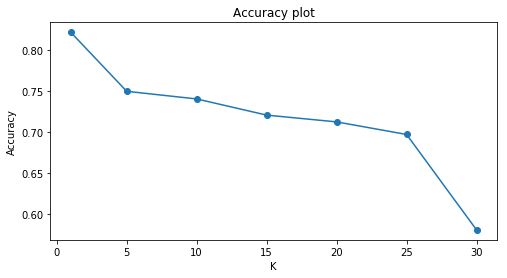

In [45]:
# Extract accuracies from result
accuracies = [i[1] for i in result ]
# set x-axis 
k = list(np.linspace(1,30,num=7,dtype= int))


# plot the accuracies according to k.
fig = plt.figure(figsize=(8,4))

# set the plot attributes
plt.plot(k,accuracies,'-o')
plt.title('Accuracy plot')
plt.xlabel('K')
plt.ylabel("Accuracy")

**We can see from the plot above that reducing the number of features influence badly the accuracy. So, reducing the number of features is not a good idea in this case, the optimal k in our case is k = 1.**

# D)
Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

In [51]:
def train_forest_model (y, x, k_indices, k,n_estim,depth):
    # get k'th subgroup in test, others in train
    y_te,y_tr,x_te,x_tr = split_train_test(y,x,k_indices,k)
    # create the randomForestClassifier model and fitting it with X_train and Y_train 
    clf = RandomForestClassifier(n_estimators= n_estim, max_depth=depth,random_state=0)
    clf.fit(x_tr, y_tr)
    # get the predicition
    y_pred = clf.predict(x_te)
    score = accuracy(y_pred, y_te)
    return score

In [52]:
# convert dataframes to numpy array
y_train = np.array(y_train)
X_train = np.array(X_train)

In [64]:
def cross_validation_forest():
    # we fix the seed to have reprodusable results
    seed = 12
    # number of folds 
    k_fold = 5
    # split data in k fold
    k_indices = build_k_indices(y_train, k_fold, seed)
    # define lists to store the loss of training data and test data
    accuracy_score = []
    # cross validation over n_estimators and max_depth
    n_estimators = np.arange(10,200,20) 
    max_depth = np.arange(1,10,1)
   
    for n_estim in n_estimators:
        for depth in max_depth:
            accuracy_tmp = []
            for k in range(k_fold):
                score = train_forest_model(y_train, X_train, k_indices, k, n_estim, depth)
                accuracy_tmp.append(score)
            accuracy_score.append({np.mean(accuracy_tmp),n_estim,depth})
    return (np.amax(accuracy_score))

In [65]:
#get the best parameters from cross validation
best_param = cross_validation_forest()

**After getting the parameters (n_estimators and max_depth) with the best accuracy, we are going now to apply the model on our training data set and then comparing the metrics with those of logistic regression.**

In [85]:
best_param = list(best_param)

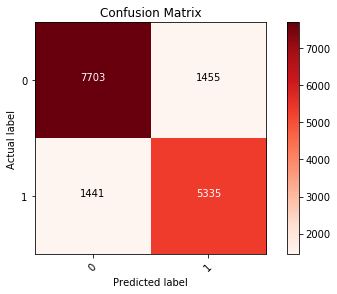

In [101]:
# train the model with the best parameters found above
clf = RandomForestClassifier(n_estimators= best_param[1], max_depth=best_param[2])
# fit the model
clf.fit(X_train, y_train)
#generate prediciton 
pred = clf.predict_proba(X_test)
# generate confusion matrix and metrics
metrics_A, metrics_NA = validation(pred,y_test,0.5, plot=True)

**For logistic regression, we had those values:**

In [103]:
print ("accuracy = {0}".format(A_tab[3]))
print ( "class adopted (positive) : precision={0}, recall={1} , F1_score={2}".format(A_tab[0],A_tab[1],A_tab[2]))
print ( "class non adopted (negative): precision={0}, recall={1} , F1_score={2}".format(NA_tab[0],NA_tab[1],NA_tab[2]))

accuracy = 0.815551650558554
class adopted (positive) : precision=0.7968404423380727, recall=0.7531730625653278 , F1_score=0.7743916481154526
class non adopted (negative): precision=0.8278842149104539, recall=0.8607773086499946 , F1_score=0.8440104028448596


**Using random forest classifier, we find those results:**

In [104]:
print ("accuracy = {0}".format(metrics_A[3]))
print ( "class adopted (positive) : precision={0}, recall={1} , F1_score={2}".format(metrics_A[0],metrics_A[1],metrics_A[2]))
print ( "class non adopted (negative): precision={0}, recall={1} , F1_score={2}".format(metrics_NA[0],metrics_NA[1],metrics_NA[2]))

accuracy = 0.8182502824149617
class adopted (positive) : precision=0.7857142857142857, recall=0.7873376623376623 , F1_score=0.7865251363703376
class non adopted (negative): precision=0.8424103237095363, recall=0.8411225158331513 , F1_score=0.8417659272210687


**Comments:** Using random forest classifier, we obtained better results. The model fits better our data and the accuracy increased comparing to logistic regression.  This can be explained by the fact that random forest classifier operates by constructing a multitude of decision trees at training time, which gives us better performances. 